### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
%matplotlib inline

### Reading data into Dataframe

In [2]:
df = pd.read_csv("census - Copy.csv")
df = df[0:5000]
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,NaN,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,NaN,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40.0,United-States,>50K
4,18,NaN,103497,Some-college,10.0,Never-married,NaN,Own-child,White,Female,0,0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49,NaN,141483,10th,NaN,Married-civ-spouse,NaN,Wife,White,Female,0,0,40.0,NaN,<=50K
4996,35,Federal-gov,191480,Bachelors,13.0,Married-spouse-absent,Exec-managerial,Not-in-family,Black,Male,0,0,40.0,NaN,<=50K
4997,40,Private,202466,HS-grad,NaN,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,60.0,NaN,<=50K
4998,50,NaN,28765,Masters,14.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,40.0,NaN,>50K


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
age               5000 non-null int64
workclass         4685 non-null object
fnlwgt            5000 non-null int64
education         5000 non-null object
education-num     2723 non-null float64
marital-status    5000 non-null object
occupation        4685 non-null object
relationship      5000 non-null object
race              5000 non-null object
sex               5000 non-null object
capital-gain      5000 non-null int64
capital-loss      5000 non-null int64
hours-per-week    4918 non-null float64
native-country    480 non-null object
income            5000 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 586.1+ KB


In [4]:
df.isna().sum()

age                  0
workclass          315
fnlwgt               0
education            0
education-num     2277
marital-status       0
occupation         315
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week      82
native-country    4520
income               0
dtype: int64

## Preprocessing

### Imputing missing values and one hot encoding using get dummies

In [5]:
df['workclass'].value_counts()

Private             3420
Self-emp-not-inc     385
Local-gov            309
State-gov            235
Self-emp-inc         186
Federal-gov          148
Without-pay            2
Name: workclass, dtype: int64

In [6]:
for column in ['workclass']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [8]:
workclass=pd.get_dummies(df['workclass'],prefix='workclass')

In [9]:
df['education-num'].value_counts()

10.0    1120
13.0     841
14.0     283
11.0     217
12.0     136
15.0      73
16.0      53
Name: education-num, dtype: int64

In [10]:
for column in ['education-num']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
educationnum=pd.get_dummies(df['education-num'],prefix='education-num')

In [12]:
df['occupation'].value_counts()

Prof-specialty       644
Exec-managerial      628
Craft-repair         607
Sales                576
Adm-clerical         552
Other-service        498
Machine-op-inspct    336
Transport-moving     214
Handlers-cleaners    207
Farming-fishing      151
Tech-support         135
Protective-serv      100
Priv-house-serv       36
Armed-Forces           1
Name: occupation, dtype: int64

In [15]:
for column in ['occupation']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [16]:
occupation=pd.get_dummies(df['occupation'],prefix='occupation')

In [17]:
df['hours-per-week'].value_counts()

40.0    2301
50.0     442
45.0     265
35.0     220
60.0     216
        ... 
57.0       1
67.0       1
62.0       1
13.0       1
59.0       1
Name: hours-per-week, Length: 72, dtype: int64

In [18]:
df['hours-per-week'].fillna((df['hours-per-week'].mean()), inplace=True)

In [19]:
df['native-country'].value_counts()

Mexico                        107
United-States                  71
Philippines                    30
Germany                        23
Puerto-Rico                    22
India                          18
Canada                         15
South                          14
El-Salvador                    13
Dominican-Republic             12
England                        12
Haiti                          12
Cuba                           11
Columbia                       10
China                           9
Guatemala                       9
Poland                          8
Jamaica                         8
Italy                           8
Portugal                        6
Japan                           6
Nicaragua                       6
Vietnam                         6
Iran                            5
Thailand                        5
Ecuador                         5
Scotland                        5
Ireland                         4
Taiwan                          3
Peru          

In [20]:
for column in ['native-country']:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [21]:
native_country=pd.get_dummies(df['native-country'],prefix='native-country')

In [22]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [23]:
income = {'<=50K': 0,'>50K': 1}
df.income = [income[item] for item in df.income]

In [24]:
df['sex'].value_counts()

Male      3309
Female    1691
Name: sex, dtype: int64

In [25]:
sex = {'Male': 1,'Female': 0}
df.sex = [sex[item] for item in df.sex]

In [26]:
df['race'].value_counts()

White                 4263
Black                  501
Asian-Pac-Islander     143
Amer-Indian-Eskimo      57
Other                   36
Name: race, dtype: int64

In [27]:
race=pd.get_dummies(df['race'],prefix='race')

In [28]:
df['relationship'].value_counts()

Husband           1966
Not-in-family     1293
Own-child          812
Unmarried          536
Wife               224
Other-relative     169
Name: relationship, dtype: int64

In [29]:
relationship=pd.get_dummies(df['relationship'],prefix='relationship')

In [30]:
df['marital-status'].value_counts()

Married-civ-spouse       2235
Never-married            1696
Divorced                  677
Widowed                   174
Separated                 153
Married-spouse-absent      62
Married-AF-spouse           3
Name: marital-status, dtype: int64

In [31]:
marital_status=pd.get_dummies(df['marital-status'],prefix='marital')

In [33]:
df['education'].value_counts()

HS-grad         1593
Some-college    1120
Bachelors        841
Masters          283
Assoc-voc        217
11th             195
10th             160
Assoc-acdm       136
7th-8th          107
9th               77
Prof-school       73
12th              55
5th-6th           53
Doctorate         53
1st-4th           24
Preschool         13
Name: education, dtype: int64

In [34]:
education=pd.get_dummies(df['education'],prefix='education')

In [35]:
df1=pd.concat([df,workclass,education,educationnum,marital_status,occupation,relationship,race,native_country],axis=1)

In [36]:
X=df1
X = X.drop('workclass',axis=1)
X = X.drop('education',axis=1)
X = X.drop('education-num',axis=1)
X = X.drop('marital-status',axis=1)
X = X.drop('occupation',axis=1)
X = X.drop('relationship',axis=1)
X = X.drop('race',axis=1)
X = X.drop('native-country',axis=1)
y=df1['income']

In [37]:
print(X.shape)
print(y.shape)

(5000, 109)
(5000,)


In [38]:
from sklearn.preprocessing import MinMaxScaler
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [39]:
X_train.shape

(3750, 109)

# Classification

## K-Nearest Neighbours

In [40]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

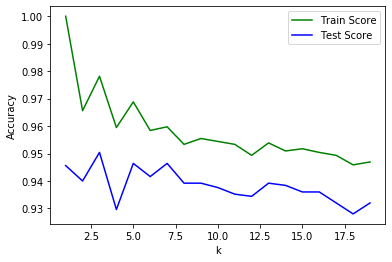

In [41]:
import matplotlib.pyplot as plt
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [42]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.9544
Train score: 0.9376


### Decision Tree Classifier

In [43]:
%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [44]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


### SVC

In [45]:
clf1 = SVC(kernel = 'linear', C = 100)
clf1.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
clf1.coef_

array([[ 2.10710097e-04,  4.96137083e-05,  4.10304308e-05,
        -3.04623026e-04, -2.17329888e-04,  5.54239319e-04,
         2.00026177e+00, -7.68943814e-05,  7.21440618e-06,
        -5.44567907e-05,  1.15432990e-04,  6.16501471e-05,
        -5.29463713e-05,  0.00000000e+00,  2.33657352e-05,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.68086602e-04,  0.00000000e+00,  0.00000000e+00,
         5.11735819e-05,  2.99935288e-05, -4.65483177e-06,
         5.43646730e-05,  1.00345861e-04,  2.14515981e-05,
         0.00000000e+00, -3.69863914e-05,  2.29032847e-04,
        -1.15342159e-04,  2.99935288e-05,  5.11735819e-05,
        -4.65483177e-06,  2.14515981e-05, -3.69863914e-05,
         5.43646730e-05, -6.90493937e-05,  3.92492050e-04,
         5.31978190e-04, -1.85553219e-04, -1.03257983e-04,
        -1.57513400e-04, -4.09096244e-04,  4.38762142e-05,
         0.00000000e+00, -1.11530733e-04,  1.35906621e-04,
        -1.26884706e-04,  1.69011916e-04,  1.38469655e-0

In [47]:
clf1.score(X_train, y_train)

1.0

In [48]:
clf1.score(X_test, y_test)

1.0

In [49]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 3750   size of test set: 1250
Best score: 1.00
Best parameters: {'C': 1, 'gamma': 0.001}


## Cross-Validation

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.80923815 0.80443911 0.79651861]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
scores = cross_val_score(logreg, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.8041958  0.81018981 0.802      0.7967968  0.7997998 ]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [52]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.80


### Stratified k-Fold Cross-Validation

In [53]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [54]:
print("Cross-validation scores:\n{}".format(cross_val_score(logreg, X, y, cv=kfold)))

Cross-validation scores:
[0.80443911 0.80443911 0.80132053]


C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kiran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Grid Search
### Naive Grid Search

In [56]:
print("Size of training set: {}   size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 3750   size of test set: 1250
Best score: 1.00
Best parameters: {'C': 1, 'gamma': 0.001}


In [57]:
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 2812   size of validation set: 938   size of test set: 1250

Best score on validation set: 0.80
Best parameters:  {'C': 0.001, 'gamma': 0.001}
Test set score with best parameters: 0.76


### Grid Search with Cross-Validation

In [58]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [61]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [62]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3)

In [63]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.001, 'gamma': 0.001}
Best cross-validation score: 0.76
